# Lista 03 - Análise Exploratória de Dados

Continuando da última lista, vamos agora realizar um pouco dos passos da análise exploratória de dados. Em particular, vamos passar pelos passos de:

1. Carregamento dos dados
1. Limpeza dos dados
1. Análise exploratória com gráficos e estatísticas simples

## Imports Básicos

As células abaixo apenas configuram nosso notebook para ficar mais parecido com os das aulas

In [1]:
from numpy.testing import assert_almost_equal
from numpy.testing import assert_equal

from numpy.testing import assert_array_almost_equal
from numpy.testing import assert_array_equal

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
plt.rcParams['figure.figsize']  = (16, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [4]:
plt.ion()
plt.style.use('seaborn-colorblind')

## Notas dos Alunos (Tutorial)

Como falamos na última lista, em muitos cenários do mundo real, os dados são carregados de fontes como arquivos. Vamos substituir o DataFrame das notas dos alunos pelo conteúdo de um arquivo de texto. 

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/icd-ufmg/icd-ufmg.github.io/master/listas/l3/grades.csv',
                 sep=',',
                 header=0)
df.head()

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


O método `read_csv` do `DataFrame` é usado para carregar dados de arquivos de texto. Como você pode ver no código de exemplo, você pode especificar opções como o delimitador de coluna e qual linha (se houver) contém cabeçalhos de coluna (neste caso, o delimitador é uma vírgula e a primeira linha contém os nomes das colunas).

Além do mais, a chamada `head` imprime as primeiras cinco linhas da nossa tabela.

### Dados Faltantes

Um dos problemas mais comuns com os quais os cientistas de dados precisam lidar são dados incompletos ou ausentes. Como podemos saber que o DataFrame contém valores ausentes? Você pode usar o método `isnull` para tal tarefa.

In [6]:
df.isnull()

,Name,StudyHours,Grade
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


Obseve como a última linha falta com o número de horas estudadas. Nas dúas últimas, faltam as notas. Caso você deseja saber a quantidade de dados faltantes, basta somar os `True`s da tabela acima. Aqui é importante saber que Python tratta `True` de forma similar ao número 1. Portanto, basta você somar a tabela inteira para pegar tal quantidade de dados faltantes.

In [7]:
df.isnull().sum()

Name          0
StudyHours    1
Grade         2
dtype: int64

Lembrando que a chamada `iloc` pega uma linha com base no número da mesma, vamos observar a última linha da tabela de dados. Observe como os valores faltantes viram `NaN`s. Além do mais, lembre-se que podemos indexar de trás para frente com o -1. -1 é a última linha, -2 a penúltima. Para entender a lógica, em um vetor de tamanho `n`, `n-1` é o último elemento. Indexar `-1` indica `n-1`.

In [8]:
df.iloc[-1]

Name          Ted
StudyHours    NaN
Grade         NaN
Name: 23, dtype: object

A penúltima.

In [9]:
df.iloc[-2]

Name          Bill
StudyHours       8
Grade          NaN
Name: 22, dtype: object

Agora que encontramos os valores faltantes, o que podemos fazer a respeito deles?

#### fillna

Uma abordagem comum é imputar valores de substituição. Por exemplo, se o número de horas de estudo está faltando, podemos simplesmente supor que o aluno estudou por um período médio de tempo e substituir o valor faltante com as horas de estudo médias. Para fazer isso, podemos usar o método fillna, como este:

In [10]:
df['StudyHours'].fillna(df['StudyHours'].mean())

0     10.000000
1     11.500000
2      9.000000
3     16.000000
4      9.250000
5      1.000000
6     11.500000
7      9.000000
8      8.500000
9     14.500000
10    15.500000
11    13.750000
12     9.000000
13     8.000000
14    15.500000
15     8.000000
16     9.000000
17     6.000000
18    10.000000
19    12.000000
20    12.500000
21    12.000000
22     8.000000
23    10.413043
Name: StudyHours, dtype: float64

Observe que a última linha foi alterada! Porém, o DataFrame original não foi.

In [11]:
df.iloc[-1]

Name          Ted
StudyHours    NaN
Grade         NaN
Name: 23, dtype: object

Para alterar, podemos trocar a coluna. Abaixo faço tal operação em uma cópia dos dados. Realizei tal escolha apenas para não mudar a tabela original.

In [12]:
df_novo = df.copy() # criar uma cópia apenas para o exemplo
df_novo['StudyHours'] = df_novo['StudyHours'].fillna(df_novo['StudyHours'].mean())
df_novo.iloc[-1]

Name             Ted
StudyHours    10.413
Grade            NaN
Name: 23, dtype: object

Observe como não mudamos nada das notas. O `fillna` pode receber uma série indexada para alterar várias colunas. Primeiramente, observe como a chamada `mean` pega a média de todas as colunas.

In [13]:
df.mean()

StudyHours    10.413043
Grade         49.181818
dtype: float64

O `fillna` então vai pegar o índice dessa série, o nome da coluna, e utilizar como chave para quais colunas imputar. O valor da série indica o valor que será imputado. Observe como os novos dados abaixo estão sem NaNs.

In [14]:
df_novo = df.fillna(df.mean())
df_novo

,Name,StudyHours,Grade
0,Dan,10.000000,50.000000
1,Joann,11.500000,50.000000
2,Pedro,9.000000,47.000000
3,Rosie,16.000000,97.000000
4,Ethan,9.250000,49.000000
5,Vicky,1.000000,3.000000
6,Frederic,11.500000,53.000000
7,Jimmie,9.000000,42.000000
8,Rhonda,8.500000,26.000000
9,Giovanni,14.500000,74.000000


In [15]:
df_novo.isnull().sum()

Name          0
StudyHours    0
Grade         0
dtype: int64

#### dropna

Outra opção é simplesmente remover todas as linhas com dados faltantes. Para tal, fazemos uso da chamada `dropna`.

In [16]:
df_novo = df.dropna()
df_novo.shape

(22, 3)

In [17]:
df.shape

(24, 3)

Observe como o novo DataFrame tem duas linhas a menos do que o anterior. A escolha de como limpar dados faltantes depende do tipo de análise que você vai realizar. Aqui, vamos seguir com o drop no `df`.

In [18]:
df.dropna(inplace=True) # on inplace=True altera o dataframe atual, não retorna um novo
df

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


### Explorando Dados

Lembre-se que você pode indexar DataFrames com vetores booleanos. Por exemplo, para pegas as notas de Skye podemos primeiramente achar a discente nos dados:

In [19]:
df['Name'] == 'Skye'

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20    False
21    False
Name: Name, dtype: bool

Obserne como acima temos uma entrada verdadeira. Esta, é justamente a linha onde temos o nome `Skye`. Ao indexar o DataFrame com tal linha, pegamos a nota da discente.

In [20]:
idx = df['Name'] == 'Skye'
df[idx]

,Name,StudyHours,Grade
19,Skye,12.0,52.0


Outra forma de fazer a mesma operação é com o método **query**. O query faz consultados usando uma línguagem similar aos bancos de dados. Um exemplo:

In [21]:
df.query('Name == "Skye"')

,Name,StudyHours,Grade
19,Skye,12.0,52.0


Podemos também pegar todas as notas acima de 60. Ou seja, os alunos aprovados.

In [22]:
df.query('Grade >= 60')

,Name,StudyHours,Grade
3,Rosie,16.00,97.0
9,Giovanni,14.50,74.0
10,Francesca,15.50,82.0
11,Rajab,13.75,62.0
14,Jenny,15.50,70.0
20,Daniel,12.50,63.0
21,Aisha,12.00,64.0


Como também os alunos que passaram estudando relativamente pouco.  No nosso caso, vamos focar em alunos que estudaram menos do que 14horas.

In [23]:
df.query('Grade >= 60 and StudyHours <= 14')

,Name,StudyHours,Grade
11,Rajab,13.75,62.0
20,Daniel,12.50,63.0
21,Aisha,12.00,64.0


Todo retorno, ou do índice booleano ou da query são outros DataFrames. Então, podemos chamar métodos como tirar a média dos alunos.

In [24]:
above_60_low_hours = df.query('Grade >= 60 and StudyHours <= 14')
type(above_60_low_hours)

pandas.core.frame.DataFrame

In [25]:
above_60_low_hours.mean()

StudyHours    12.75
Grade         63.00
dtype: float64

Podemos também buscar os alunos que estão acima da média!

In [26]:
mean = df['Grade'].mean()
df[df['Grade'] >= mean]

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
3,Rosie,16.00,97.0
6,Frederic,11.50,53.0
9,Giovanni,14.50,74.0
10,Francesca,15.50,82.0
11,Rajab,13.75,62.0
14,Jenny,15.50,70.0
19,Skye,12.00,52.0
20,Daniel,12.50,63.0


ou, via query.

In [27]:
df.query(f'Grade >= {mean}')

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
3,Rosie,16.00,97.0
6,Frederic,11.50,53.0
9,Giovanni,14.50,74.0
10,Francesca,15.50,82.0
11,Rajab,13.75,62.0
14,Jenny,15.50,70.0
19,Skye,12.00,52.0
20,Daniel,12.50,63.0


Os DataFrames são incrivelmente versáteis e facilitam a manipulação de dados. Muitas operações DataFrame retornam uma nova cópia do DataFrame; portanto, se quiser modificar um DataFrame, mas manter a variável existente, você precisará atribuir o resultado da operação à variável existente. Por exemplo, o código a seguir classifica os dados do aluno em ordem decrescente de nota e atribui o DataFrame classificado resultante à variável `df_students`. 

In [28]:
# Re-ordena os dados por nota
df_students = df.sort_values('Grade', ascending=False)
df_students

,Name,StudyHours,Grade
3,Rosie,16.00,97.0
10,Francesca,15.50,82.0
9,Giovanni,14.50,74.0
14,Jenny,15.50,70.0
21,Aisha,12.00,64.0
20,Daniel,12.50,63.0
11,Rajab,13.75,62.0
6,Frederic,11.50,53.0
19,Skye,12.00,52.0
1,Joann,11.50,50.0


### Visualizando dados com Matplotlib

Os DataFrames fornecem uma ótima maneira de explorar e analisar dados tabulares, mas uma imagem vale mil palavras. A biblioteca [Matplotlib](matplotlib.org) fornece a base para a plotagem de visualizações de dados.

Vamos começar com um histograma de notas. Observe como também colocamos uma linha preta em cada barra `edgecolor='k'` e setamos rótulos ao X e Y (para sabermos qual eixo mostra quais dados).

Text(0, 0.5, 'Num. Students')

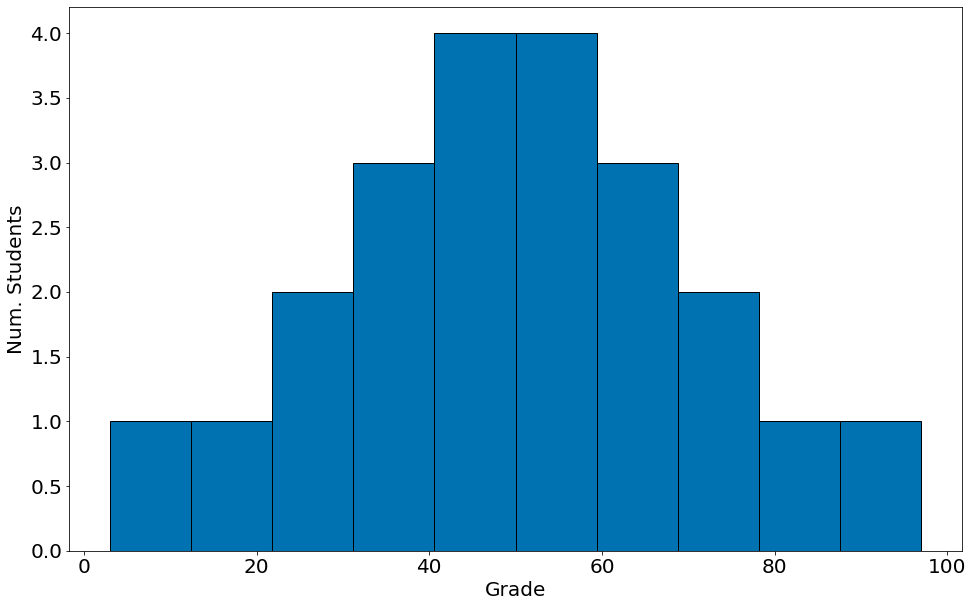

In [29]:
plt.hist(df_students['Grade'], edgecolor='k')
plt.xlabel('Grade')
plt.ylabel('Num. Students')

Observe como as notas concentram em 50. Às vezes é mais simples interpretar a função cumulativa dos dados.  Vamos fazer este gráfico de uma forma diferente da que vimos em sala de aula. Alterando um pouco a chamada `hist` podemos pegar a cumulativa.

Text(0, 0.5, 'Num. Students with Grade <= x')

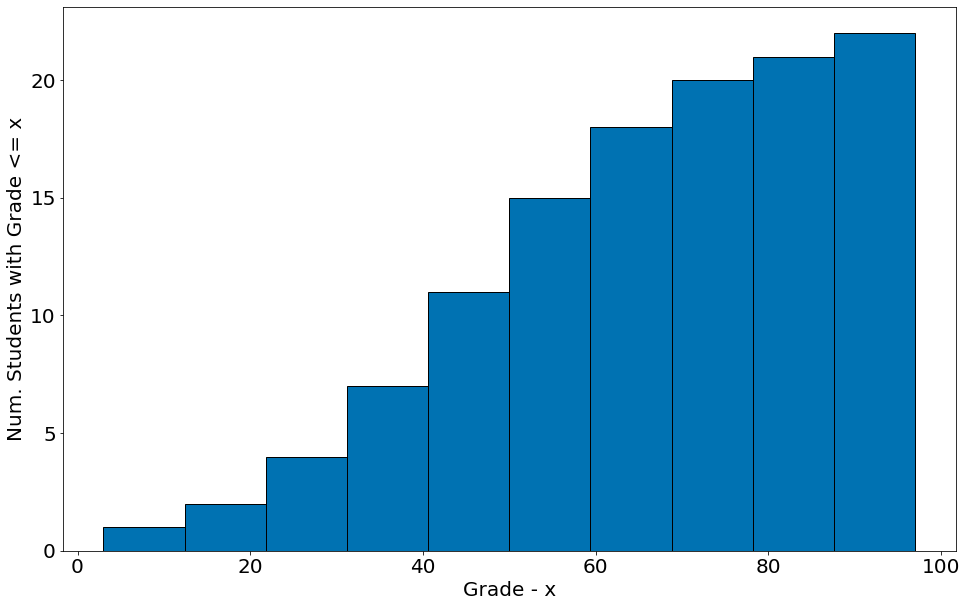

In [30]:
plt.hist(df_students['Grade'], edgecolor='k', cumulative=True)
plt.xlabel('Grade - x')
plt.ylabel('Num. Students with Grade <= x')

Agora, `density=True` transforma este plot em uma função cumulativa de probabilidade.

Text(0, 0.5, 'Frac. Students with Grade <= x')

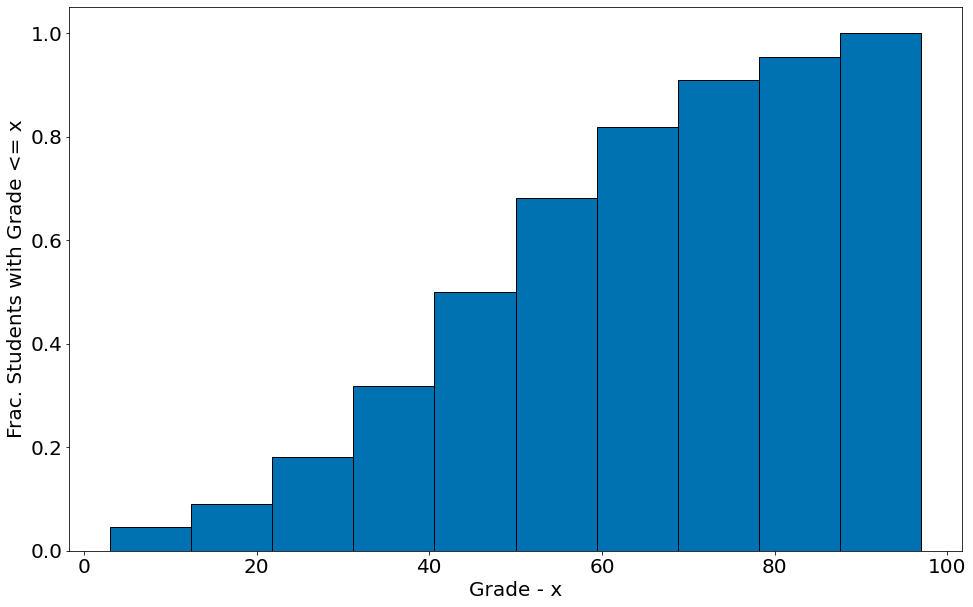

In [31]:
plt.hist(df_students['Grade'], edgecolor='k', cumulative=True, density=True)
plt.xlabel('Grade - x')
plt.ylabel('Frac. Students with Grade <= x')

Observe que 50% dos alunos (0.5 no eixo-y) tem nota menor ou igual à mais ou menos 47~50 (eixo-x). Isto pode ser verificado com a chamada median abaixo. Outro exemplo, tente entender no gráfico, 20% dos alunos (eixo-y) tem nota menor ou igual à mais ou menos 30.

In [32]:
df_students['Grade'].median()

49.5

Até agora, você usou métodos do Matplotlib.pyplot para plotar gráficos. No entanto, muitos pacotes, incluindo Pandas, fornecem métodos que abstraem as funções Matplotlib simplificando sua vida. Por exemplo, o DataFrame fornece seus próprios métodos para plotar dados, conforme mostrado no exemplo a seguir para plotar um gráfico de barras de horas de estudo. 

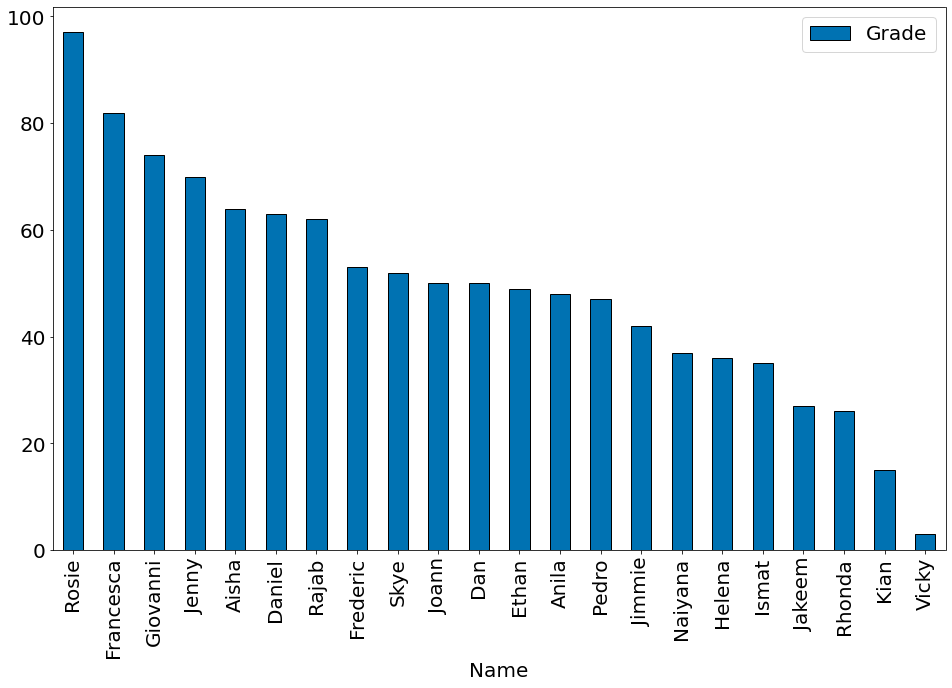

In [33]:
df_students.plot.bar(x='Name', y='Grade', edgecolor='k')

Ou o mesmo histograma de antes.

Text(0, 0.5, 'Num. Students')

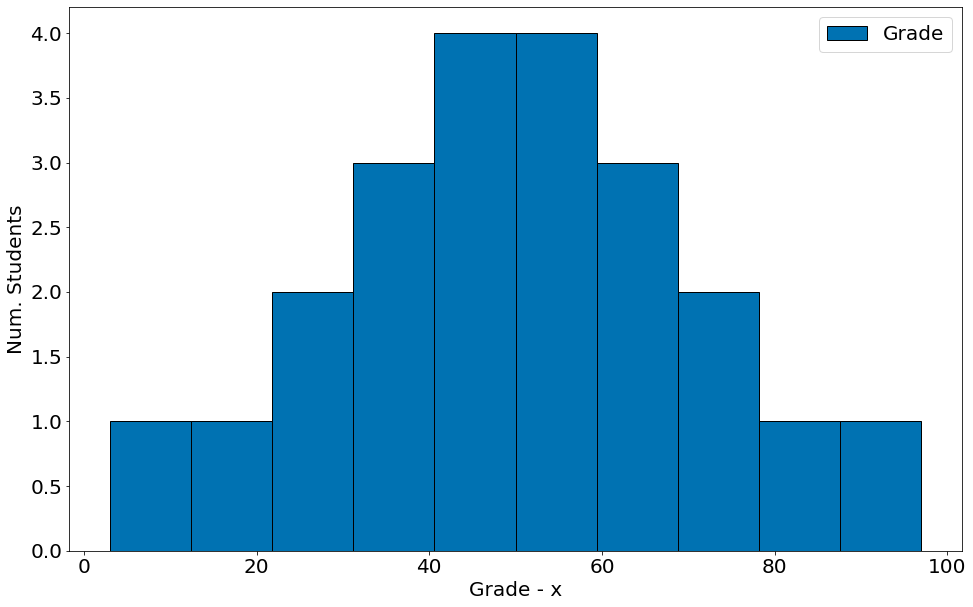

In [34]:
df_students.plot.hist(y='Grade', edgecolor='k')
plt.xlabel('Grade - x')
plt.ylabel('Num. Students')

Como também uma versão contínua do histograma. Esta é chamada de Kernel Density Estimation (vimos rapidamente em sala de aula).

Text(0, 0.5, 'Density')

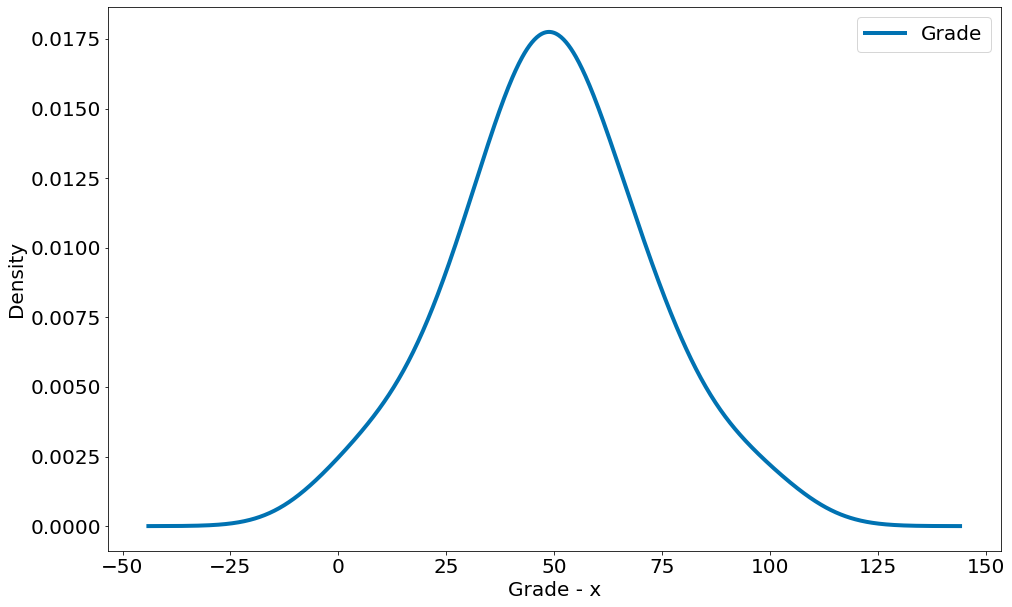

In [35]:
df_students.plot.kde(y='Grade')
plt.xlabel('Grade - x')
plt.ylabel('Density')

### Estatísticas

#### Medidas de tendência central

Para entender melhor a distribuição, podemos examinar as chamadas medidas de tendência central; que é uma maneira sofisticada de descrever estatísticas que representam o "meio" dos dados. O objetivo disso é tentar encontrar um valor "típico". Maneiras comuns de definir o meio dos dados incluem:
  * A média: uma média simples baseada na soma de todos os valores no conjunto de amostra e, em seguida, na divisão do total pelo número de amostras.
  * A mediana: o valor no meio do intervalo de todos os valores de amostra.
  * A moda: o valor de ocorrência mais comum no conjunto de amostra.

Vamos calcular esses valores, junto com os valores mínimo e máximo para comparação, e mostrá-los no histograma. Primeiramente, observe como podemos pegar tais valores direto do DataFrame.

In [36]:
df.mean()

StudyHours    10.522727
Grade         49.181818
dtype: float64

In [37]:
df.median()

StudyHours    10.0
Grade         49.5
dtype: float64

Ou, descrever o DataFrame como um todo. Aqui pegamos a média, mínimo, máximo e quartis (mais abaixo) dos dados.

In [38]:
df.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


Além disso, podemos focar em um vetor de dados específico.

In [39]:
data = df['Grade']


min_ = data.min()
max_ = data.max()
mean = data.mean()
median = data.median()
mode = data.mode()[0]

print(min_, max_, mean, median, mode, sep=', ')

3.0, 97.0, 49.18181818181818, 49.5, 50.0


Abaixo plotamos cada estatística em linhas verticais.

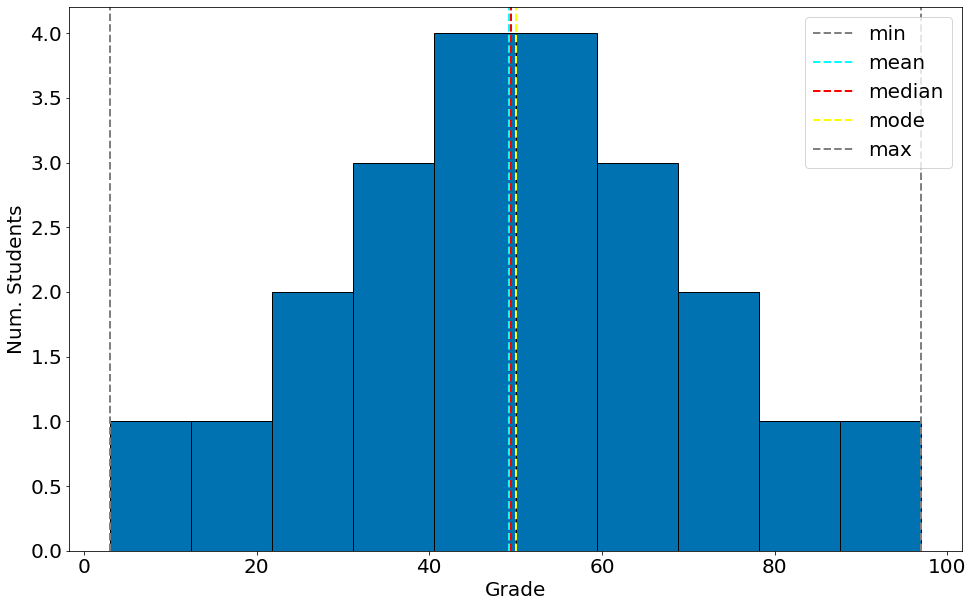

In [40]:
# Histograma
plt.hist(data, edgecolor='k')
plt.xlabel('Grade')
plt.ylabel('Num. Students')

# Linhas para cada estatística
plt.axvline(x=min_, color = 'gray', linestyle='dashed', linewidth = 2, label='min')
plt.axvline(x=mean, color = 'cyan', linestyle='dashed', linewidth = 2, label='mean')
plt.axvline(x=median, color = 'red', linestyle='dashed', linewidth = 2, label='median')
plt.axvline(x=mode, color = 'yellow', linestyle='dashed', linewidth = 2, label='mode')
plt.axvline(x=max_, color = 'gray', linestyle='dashed', linewidth = 2, label='max')

# Adiciona uma legenda
plt.legend()

### Medidas de variância

Portanto, agora temos uma boa ideia de onde estão as estatísticas centrais dos dados. No entanto, há outro aspecto das distribuições que devemos examinar: quanta variabilidade existe nos dados?

As estatísticas típicas que medem a variabilidade nos dados incluem:

* Intervalo: a diferença entre o máximo e o mínimo. Não há função incorporada para isso, mas é fácil calcular usando as funções mín e máx.
* Variância: a média da diferença quadrática da média. Você pode usar a função var integrada para encontrar isso.
* Desvio padrão: a raiz quadrada da variância. Você pode usar a função std embutida para encontrar isso. 

In [41]:
for col_name in ['Grade', 'StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var(ddof=1)
    std = col.std(ddof=1)
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std.Dev: 21.74

StudyHours:
 - Range: 15.00
 - Variance: 12.16
 - Std.Dev: 3.49


#### Quartis

Na estatística descritiva, um quartil é qualquer um dos três valores que divide o conjunto ordenado de dados em quatro partes iguais, e assim cada parte representa 1/4 da amostra ou população.

Assim, no caso duma amostra ordenada,
  * primeiro quartil (designado por Q1/4) = quartil inferior = é o valor aos 25% da amostra ordenada = 25º percentil
  * segundo quartil (designado por Q2/4) = mediana = é o valor até ao qual se encontra 50% da amostra ordenada = 50º percentil, ou 5º decil.
  * terceiro quartil (designado por Q3/4) = quartil superior = valor a partir do qual se encontram 25% dos valores mais elevados = valor aos 75% da amostra ordenada = 75º percentil
  * à diferença entre os quartis superior e inferior chama-se amplitude inter-quartil.
  
Observe como os quartis estão presentes na sumarização dos dados. São as linhas 25%, 50% (mediana) e 75%.

In [42]:
df.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


#### Comparando Dados

Por fim, vamos comparar o tempo de estudo entre os alunos que passaram ou não. Para tal, vamos definir qualquer nota >= 60 como sendo uma aprovação. Depois disso, vamos alterar o DataFrame para conter tal informação.

Primeiro criando a série com tal informação.

In [43]:
passed = df['Grade'] >= 60
passed

0     False
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9      True
10     True
11     True
12    False
13    False
14     True
15    False
16    False
17    False
18    False
19    False
20     True
21     True
Name: Grade, dtype: bool

Agora, alterando o DataFrame.

In [44]:
df['Passed'] = passed
df

,Name,StudyHours,Grade,Passed
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


Agora, vamos entender o tempo de dedicação dos alunos que passam e dos que não passam. Podemos fazer uso do Boxplot para tal comparativo. Na estatística descritiva, o boxplot é uma ferramenta gráfica para representar a variação de dados observados de uma variável numérica por meio de quartis.

A "caixa" mostra o primeiro e terceiro quartil. A linha no meio mostra o segundo, a mediana. Portanto, a caixa se estende dos valores dos quartil de Q1 a Q3 dos dados, com uma linha na mediana (Q2). Os bigodes se estendem das bordas da caixa para mostrar a extensão dos dados. Por padrão, eles estendem não mais do que 1,5 * IQR (IQR = Q3 - Q1) das bordas da caixa, terminando no ponto de dados mais distante dentro desse intervalo. Valores fora desta faix são plotados como pontos separados. 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


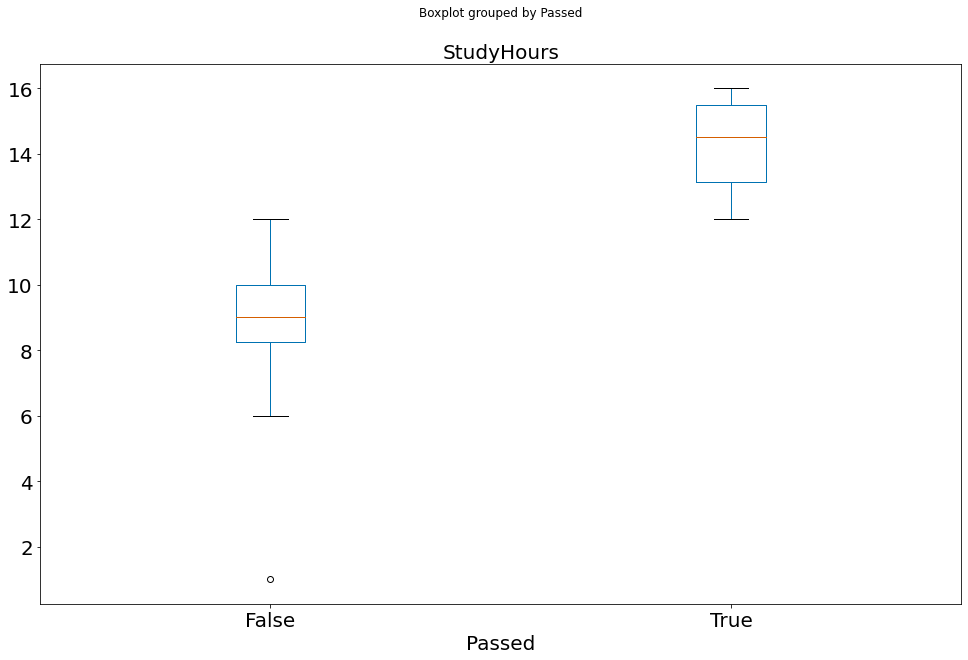

In [45]:
df.boxplot(column='StudyHours', by='Passed', grid=False)

Observe que, como esperado, alunos que passam estudam mais. Os quartis, portanto a distribuição dos dados, são mais altos. Para observar os valores podemos fazer um groupby.

Abaixo eu agrupo os dados por passou ou não. Depois, pego as horas de estudo. Por fim, observo as estatíticas.

In [46]:
df.groupby('Passed')['StudyHours'].describe()

,count,mean,std,min,25%,50%,75%,max
Passed,,,,,,,,
False,15.0,8.783333,2.647213,1.0,8.250,9.0,10.0,12.0
True,7.0,14.250000,1.561249,12.0,13.125,14.5,15.5,16.0


Observe como 25% (primeiro quartil) dos alunos que não passam, estudam menos do que 8,25 horas. Para os que passam, este valor é de 13,125. Agora pense no complemento dos 25%. 75% dos alunos que passam estudam pelo menos 13h! Isso é bem maior do que as 8h dos que não passam!

### Correlacionando Dados

Por fim, podemos correlacional o tempo de estudo com a nota.

Text(0, 0.5, 'Grade')

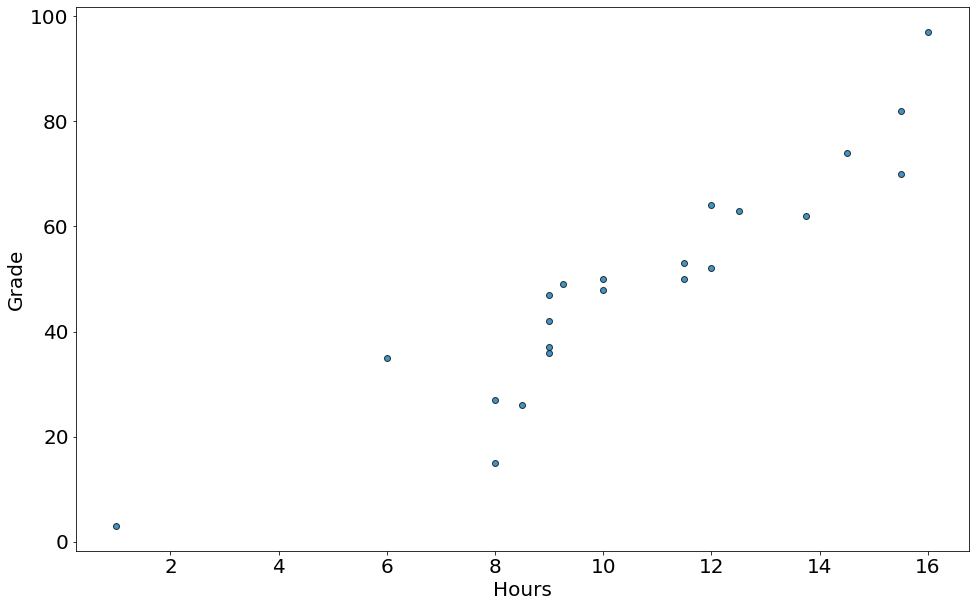

In [47]:
plt.scatter(df.StudyHours, df.Grade, edgecolor='k', alpha=0.75)
plt.xlabel('Hours')
plt.ylabel('Grade')

## Exercícios (Flight Data)

Eu espero que o tutorial acima tenha sido uma boa revisão de análise exploratória de dados. Agora é com você! Nesta lista, você explorará um conjunto de dados do mundo real contendo dados de voos do Departamento de Transporte dos EUA.

Vamos começar carregando e visualizando os dados. 

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/icd-ufmg/icd-ufmg.github.io/master/listas/l3/flights.csv')

O conjunto de dados contém observações de voos domésticos dos EUA em 2013 e consiste nos seguintes campos:
* Ano: o ano do voo (todos os registros são de 2013)
* Mês: o mês do voo
* Dia do mês: o dia do mês em que o voo partiu
* DayOfWeek: o dia da semana em que o voo partiu - de 1 (segunda-feira) a 7 (domingo)
* Transportadora: a abreviatura de duas letras da companhia aérea.
* OriginAirportID: Um identificador numérico exclusivo para o aeroporto de partida
* Nome do aeroporto de origem: o nome completo do aeroporto de partida
* OriginCity: a cidade do aeroporto de partida
* Estado de origem: o estado do aeroporto de partida
* DestAirportID: Um identificador numérico único para o aeroporto de destino
* DestAirportName: o nome completo do aeroporto de destino
* DestCity: a cidade do aeroporto de destino
* DestState: o estado do aeroporto de destino
* CRSDepTime: a hora de partida programada
* DepDelay: o número de minutos de atraso na partida (o voo que saiu antes do horário tem um valor negativo)
* DelDelay15: Um indicador binário de que a partida foi atrasada por mais de 15 minutos (e, portanto, considerada "atrasada")
* CRSArrTime: a hora de chegada programada
* ArrDelay: o número de minutos de atraso na chegada (o voo que chegou antes do horário tem um valor negativo)
* ArrDelay15: Um indicador binário de que a chegada foi atrasada em mais de 15 minutos (e, portanto, considerada "atrasada")
* Cancelado: um indicador binário de que o voo foi cancelado 

In [49]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


### Exercício 1

Conte a quantidade de dados faltantes na tabela. Isto é, em TODAS as células. O método retorna apenas um número.

In [50]:
def count_missing(df) -> int:
    return df.isnull().sum().sum()

In [51]:
count_missing(df)
assert_equal(2761, count_missing(df))


### Exercício 2

Crie um novo DataFrame sem as linhas com dados faltantes

In [52]:
def drop_missing(df):
    return df.dropna()

In [53]:
assert_equal(269179, drop_missing(df).shape[0])

### Exercício 3

Retorne a mediana de TODAS as colunas numéricas do DataFrame

In [54]:
def all_median(df):
    return df.median()

In [55]:
assert_equal(2013, all_median(df)['Year'])
assert_equal(7, all_median(df)['Month'])

### Exercício 4

Quais são os atrasos médios (médios) de partida e chegada? Retorne uma tupla.

In [56]:
def delay(df) -> tuple:
    df = drop_missing(df)
    return (df['DepDelay'].describe()['mean'], df['ArrDelay'].describe()['mean'])

In [57]:
assert_almost_equal(10.456614371849216, delay(df)[0])
assert_almost_equal(6.563286883449304, delay(df)[1])

### Exercício 5

Indique qual rota tem o maior tempo de voo em MÉDIA. Use a coluna OriginAirportName e DestinationAirportName. Retorne uma tupla `(OriginAirportName, DestinationAirportName)`. Lembre-se de não considerar voos cancelados!

In [58]:
def high_delay(df):
    test = df[df['Cancelled'] == 0]
    test = test.groupby(['OriginAirportName', 'DestAirportName'])
    high_time_mean = 0
    origin = ""
    dest = ""

    for group_key, group_value in test:
        group = test.get_group(group_key)
        time_mean = group['CRSArrTime'].mean() + group['ArrDelay'].mean() - (group['CRSDepTime'].mean() + group['DepDelay'].mean())
        if(time_mean>high_time_mean):
          high_time_mean = time_mean
          origin = df.iloc[group.index[0]]['OriginAirportName']
          dest = df.iloc[group.index[0]]['DestAirportName']

    return (origin, dest)

In [62]:
# test = high_delay(df)
# print(test[0])
# test[1]

Honolulu International


'Portland International'

### Exercício 6

Faça um boxplot dos atrasos de saída por dia da semana!

1. Dica, use `grid=False, showfliers=False` para o plot ficar mais limpo

*Saída esperada*

![](https://raw.githubusercontent.com/icd-ufmg/icd-ufmg.github.io/master/listas/l3/plot1.png)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


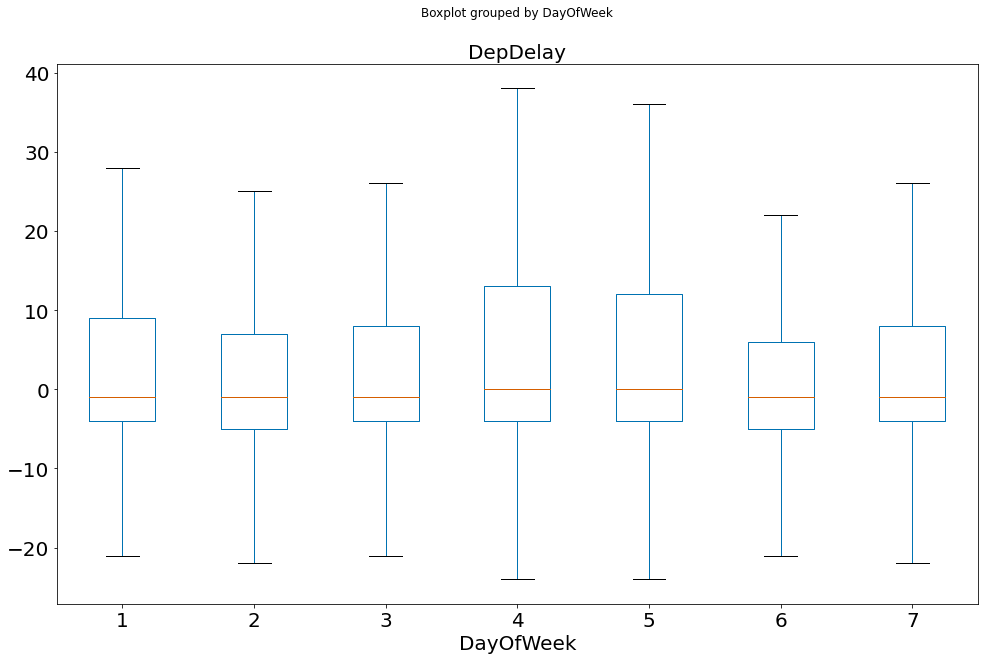

In [60]:
df.boxplot(column='DepDelay', by='DayOfWeek', grid=False, showfliers=False)

### Exercício 7

Correlacione o atraso de saída com o atraso de chegada!

1. Dica, remova os voos cancelados

*Saída esperada*

![](https://raw.githubusercontent.com/icd-ufmg/icd-ufmg.github.io/master/listas/l3/plot2.png)

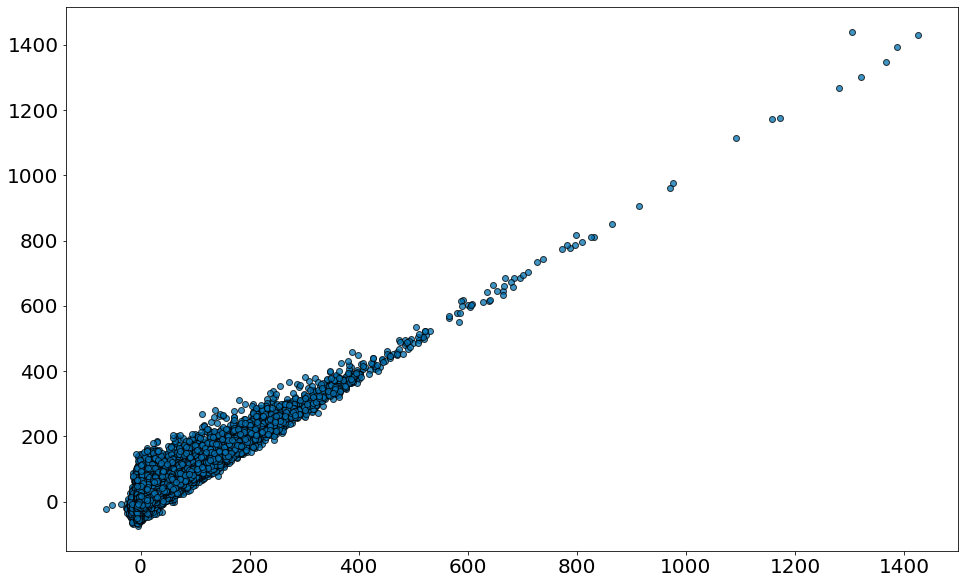

In [61]:
new_df = df[df['Cancelled'] != 1]
plt.scatter(new_df.DepDelay, new_df.ArrDelay, edgecolor='k', alpha=0.75)
